In [97]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data.feature_names
data.data.shape
data.data[:,10]
X = data.data[:,[0,2]]
y = data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [2]:
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'xtick.color':'w','ytick.color':'w','axes.labelcolor':'gold'})
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt

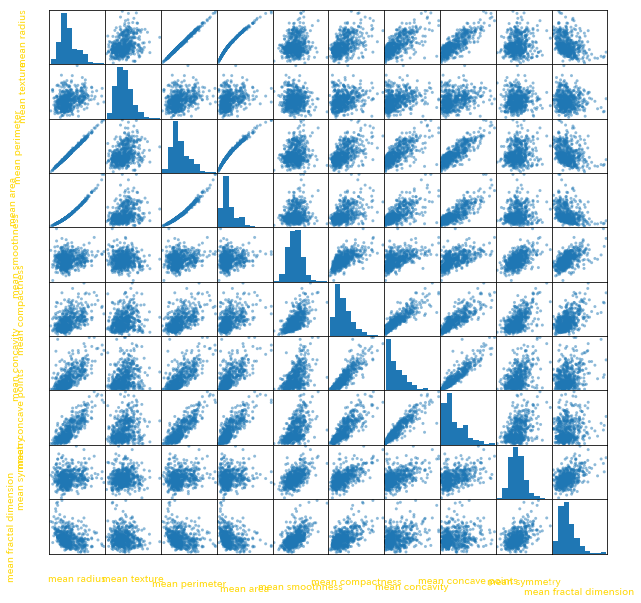

In [18]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(data.data[:,0:10],columns=data.feature_names[0:10])
scatter_matrix(df,figsize= (10,10));


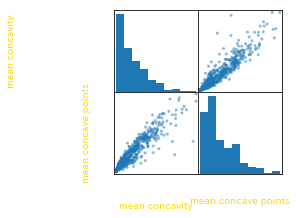

In [19]:
df = pd.DataFrame(data.data[:, 6:8],
                  columns=data.feature_names[6:8])
scatter_matrix(df, figsize=(3,3));

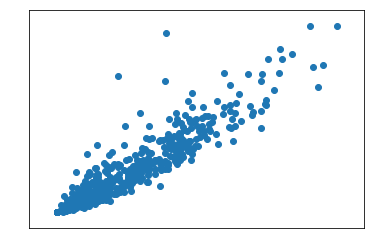

In [44]:
# plt.scatter(pd.DataFrame(X))
pd.DataFrame(data.data[:,:6]) # 0-5 0から数えるから5で終わる
pd.DataFrame(data.data[:,:8]) # 0-7  0から８個数えると7まで
Xy = pd.DataFrame(data.data[:,6:8]) # 6,7番目のデータ 
y = Xy[0] # 6番目
X = Xy[1] # 7番目
plt.scatter(X,y)

Text(0, 0.5, 'mean perimeter')

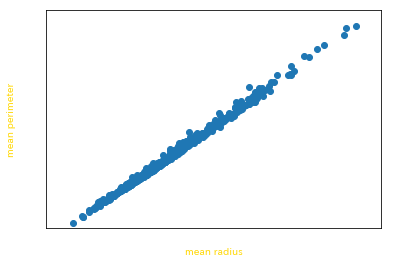

In [70]:
X =  pd.DataFrame(data.data[:,[0,2]]) # 特徴量　の0,2を取り出す。
names = data.feature_names[[0,2]]
plt.scatter(X[0],X[1])
plt.ylim(40,200)
plt.xlim(5,30)
plt.xlabel(names[0])
plt.ylabel(names[1])
# 相関関係が大きい相関

In [71]:
from sklearn.decomposition import PCA # 主成分分析→次元削除

In [72]:
pca = PCA()

In [73]:
pca.fit(X) # 相関の強い2つの特徴量を１つにする。

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [76]:
X_new =  pca.transform(X)
X_new

array([[ 3.10663327e+01,  5.93288220e-01],
       [ 4.14317382e+01, -5.13403959e-01],
       [ 3.84355928e+01, -5.78684115e-02],
       ...,
       [ 1.65167519e+01, -1.07995749e-01],
       [ 4.85617910e+01,  4.88218829e-01],
       [-4.45068499e+01, -7.86046551e-03]])

(-60, 120)

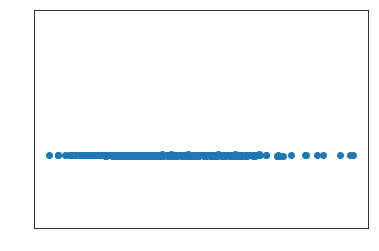

In [84]:
plt.scatter(X_new[:,0],X_new[:,1])
plt.ylim(-60, 120)

Text(0, 0.5, 'mean concave points')

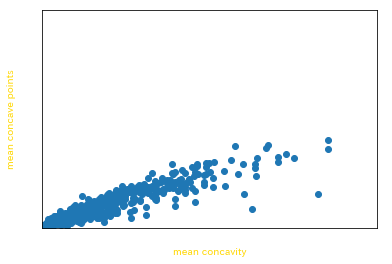

In [85]:
X = data.data[:, [6,7]]
y = data.target
names = data.feature_names[[6,7]]

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.xlabel(names[0])
plt.ylabel(names[1])

(-0.25, 0.25)

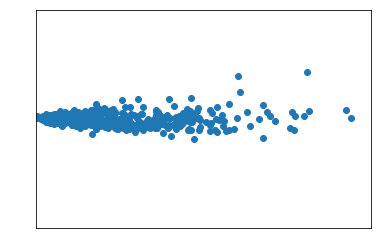

In [87]:
pca.fit(X)
X_new =  pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [88]:
from sklearn.preprocessing import PolynomialFeatures # 特徴量を多項式に見立てて作成する

In [90]:
polf =  PolynomialFeatures(degree=2) # 2個取り出すとする

In [98]:
X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [99]:
polf.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [100]:
X_train_poly = polf.transform(X_train)
X_test_poly =  polf.transform(X_test)

In [102]:
X_train_poly.shape,X_test_poly.shape

((455, 496), (114, 496))

In [104]:
from sklearn import linear_model
clf =  linear_model.LogisticRegression()
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)

/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.956140350877193

In [105]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.956140350877193